# 🍊🗿제주 특산물 가격 예측 (최종 28등)

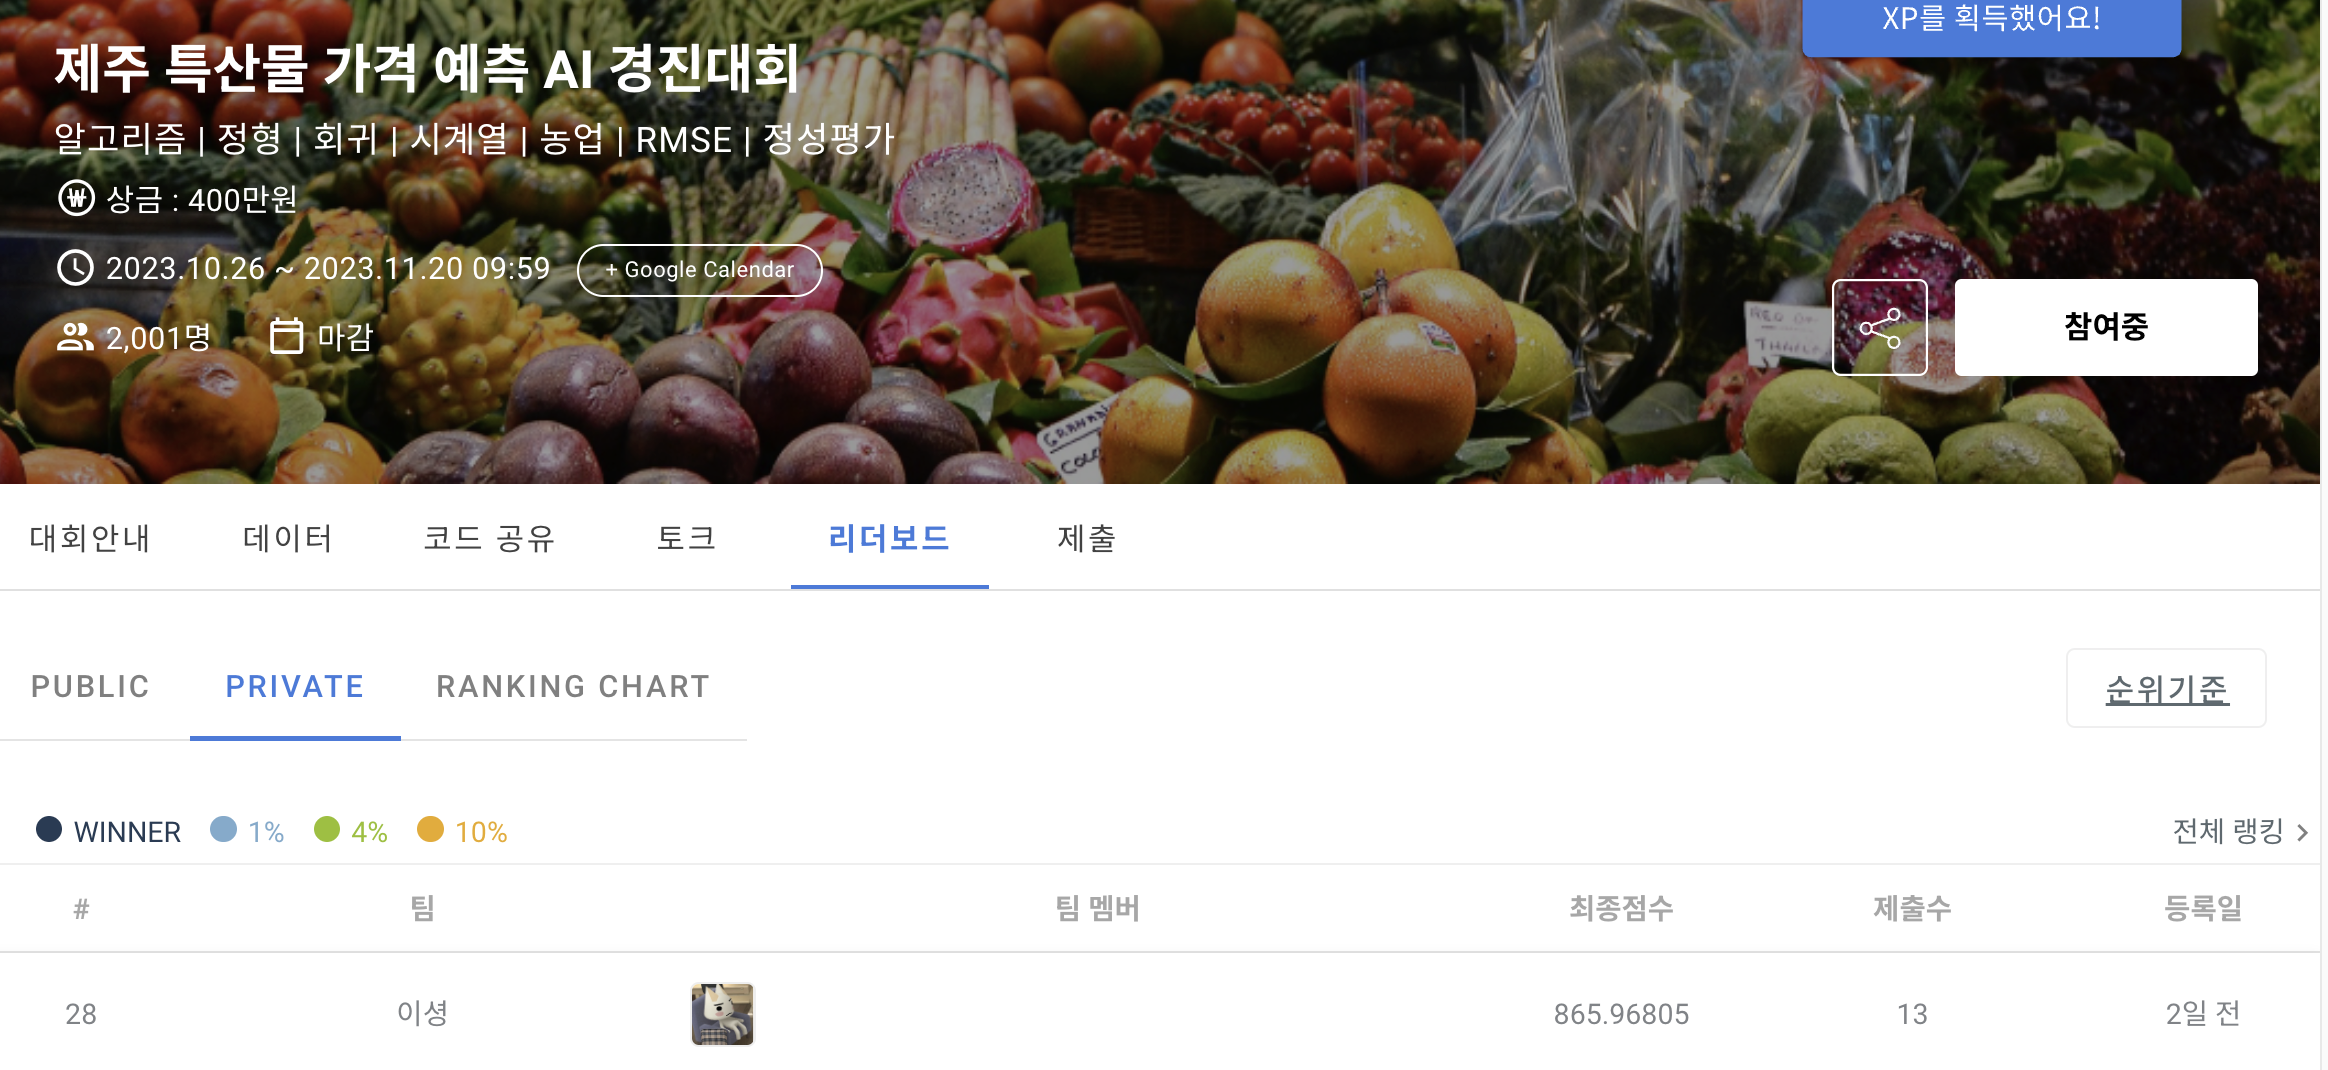

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
path1 = '/content/drive/MyDrive/셩 코딩 연습/data/jeju/train.csv'
path2 = '/content/drive/MyDrive/셩 코딩 연습/data/jeju/sample_submission.csv'
path3 = '/content/drive/MyDrive/셩 코딩 연습/data/jeju/test.csv'

In [ ]:
df = pd.read_csv(path1)
df_s = pd.read_csv(path2)
df_t = pd.read_csv(path3)

## 🍋 Autogluon
: 다양한 알고리즘으로, customized parameter 범위 내에서 최적의 알고리즘을 셀렉 해주는 기법

- 단 한 줄의 코드로 원시 데이터에서 매우 정확한 모델을 생성할 수 있음

- 오토글루온 모듈은 원시 시계열 데이터를 적절한 형식으로 자동 처리한 다음 다양한 최신 딥 러닝 모델을 훈련|조정 하여 정확한 예측을 생성

- item_id 각 행이 쌍으로 식별되는 일변량 시계열 모음
  
  예를 들어 시계열 데이터 프레임은 제품 컬렉션의 일일 판매량을 나타낼 수 있으며, 각 제품은 **item_id** 제품에 해당하고, **timestamp** 기록 날짜에 해당한다.

In [ ]:
#!conda create -n myenv python=3.9 cudatoolkit=11.3 -y
#!conda activate myen

/bin/bash: line 1: conda: command not found
/bin/bash: line 1: conda: command not found


In [ ]:
#!pip install torch==1.13.1+cu117 torchvision==0.14.1+cu117 --extra-index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117
^C


In [ ]:
import torch
#print(torch.cuda.is_available())  # Should be True
#print(torch.cuda.device_count())  # Should be > 0

In [ ]:
#!pip install -U pip
#!pip install -U setuptools wheel

#!Install the proper version of PyTorch following https://pytorch.org/get-started/locally/
#!pip install torch==1.13.1+cu117 torchvision==0.14.1+cu117 --extra-index-url https://download.pytorch.org/whl/cu117

!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.0/224.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.7/285.7 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.3/372.3 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 MB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 10.0 

In [ ]:
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

In [ ]:
df = pd.read_csv(path1)[['ID','timestamp','price(원/kg)']]

## Data preprocessing

In [ ]:
df['item_id'] = df.ID.str[0:6] #TG_A_J 만 출력해서 컬럼 제작
df
#item_id : 정적 기능과 연결(시간이 지나도 변경되지 않는 기능)
#          데이터 세트에 포함된 고유 시계열 목록

,ID,timestamp,price(원/kg),item_id
0,TG_A_J_20190101,2019-01-01,0.0,TG_A_J
1,TG_A_J_20190102,2019-01-02,0.0,TG_A_J
2,TG_A_J_20190103,2019-01-03,1728.0,TG_A_J
3,TG_A_J_20190104,2019-01-04,1408.0,TG_A_J
4,TG_A_J_20190105,2019-01-05,1250.0,TG_A_J
...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,468.0,RD_F_J
59393,RD_F_J_20230228,2023-02-28,531.0,RD_F_J
59394,RD_F_J_20230301,2023-03-01,574.0,RD_F_J
59395,RD_F_J_20230302,2023-03-02,523.0,RD_F_J


In [ ]:
#TimeSeriesDataFrame() : 직렬화/역직렬화, 복사 및 슬라이스 작업 중에 정적 기능의 일관성 보장
data = TimeSeriesDataFrame(df.drop(columns=['ID']))
predictor = TimeSeriesPredictor(
    prediction_length=27,   #prediction_length=n 으로 지정하지 않으면 기본적으로 확률 생성 후 가중 분위수 손실을 통해 점수를 매김
    target="price(원/kg)",
    eval_metric="RMSE",
)
# seed 고정
predictor.fit( data, random_seed=42, )

================ TimeSeriesPredictor ================
TimeSeriesPredictor.fit() called
Fitting with arguments:
{'enable_ensemble': True,
 'evaluation_metric': 'RMSE',
 'excluded_model_types': None,
 'hyperparameter_tune_kwargs': None,
 'hyperparameters': 'default',
 'num_val_windows': 1,
 'prediction_length': 27,
 'random_seed': 42,
 'target': 'price(원/kg)',
 'time_limit': None,
 'verbosity': 2}
Provided training data set with 59397 rows, 39 items (item = single time series). Average time series length is 1523.0. Data frequency is 'D'.
INFO:lightning_fabric.utilities.seed:Global seed set to 42
AutoGluon will save models to AutogluonModels/ag-20231118_105213/
AutoGluon will gauge predictive performance using evaluation metric: 'RMSE'
	This metric's sign has been flipped to adhere to being 'higher is better'. The reported score can be multiplied by -1 to get the metric value.

Provided dataset contains following columns:
	target:           'price(원/kg)'
	past covariates:  ['supply(kg)']


In [ ]:
predictor.refit_full()

Refitting models via `refit_full` using all of the data (combined train and validation)...
	Models trained in this way will have the suffix '_FULL' and have NaN validation score.
	This process is not bound by time_limit, but should take less time than the original `fit` call.
Fitting model: Naive_FULL | Skipping fit via cloning parent ...
Fitting model: SeasonalNaive_FULL | Skipping fit via cloning parent ...
Fitting model: Theta_FULL | Skipping fit via cloning parent ...
Fitting model: AutoETS_FULL | Skipping fit via cloning parent ...
Fitting model: RecursiveTabular_FULL
	2.95    s     = Training runtime
Fitting model: WeightedEnsemble_FULL | Skipping fit via cloning parent ...
Refit complete. Models trained: ['Naive_FULL', 'SeasonalNaive_FULL', 'Theta_FULL', 'AutoETS_FULL', 'RecursiveTabular_FULL', 'WeightedEnsemble_FULL']
Total runtime: 2.98 s
Updated best model to 'WeightedEnsemble_FULL' (Previously 'WeightedEnsemble'). AutoGluon will default to using 'WeightedEnsemble_FULL' for p

{'Naive': 'Naive_FULL',
 'SeasonalNaive': 'SeasonalNaive_FULL',
 'Theta': 'Theta_FULL',
 'AutoETS': 'AutoETS_FULL',
 'RecursiveTabular': 'RecursiveTabular_FULL',
 'WeightedEnsemble': 'WeightedEnsemble_FULL'}

In [ ]:
# seed 고정
pred = predictor.predict(data, random_seed=42, )
pred

INFO:lightning_fabric.utilities.seed:Global seed set to 42
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble_FULL


mean          0.1          0.2          0.3  \
item_id timestamp                                                        
TG_A_J  2023-03-04  2948.134695  -124.345905   876.325445  1603.242999   
        2023-03-05   867.380040 -2882.764864 -1609.023726  -696.955248   
        2023-03-06  3008.573839 -1322.626666   225.471264  1271.224723   
        2023-03-07  3218.185521 -1387.861248   186.162165  1261.551440   
        2023-03-08  3145.701008 -1496.596258    63.724341  1248.384826   
...                         ...          ...          ...          ...   
RD_F_J  2023-03-31   517.852611  -311.920012   -16.524182   172.149596   
        2023-04-01   523.551030  -276.895109     0.291895   198.560601   
        2023-04-02   204.159384  -618.379005  -337.914809  -134.059797   
        2023-04-03   519.599247  -316.384476   -25.346967   179.340922   
        2023-04-04   532.379162  -330.431441   -35.758375   161.230012   

                            0.4          0.5          0.6          0.7  \
item_id timestamp                                                        
TG_A_J  2023-03-04  2347.849199  2998.823782  3669.650984  4335.247190   
        2023-03-05    40.562380   698.976192  1465.157329  2235.725903   
        2023-03-06  2173.468094  2963.855194  3711.918619  4602.012479   
        2023-03-07  2200.350642  3051.875719  3975.493146  4897.360623   
        2023-03-08  2214.102872  3103.998355  3990.017882  5017.181910   
...                         ...          ...          ...          ...   
RD_F_J  2023-03-31   345.461536   495.621313   666.564851   857.069266   
        2023-04-01   365.376173   521.882349   686.076580   849.692924   
        2023-04-02    33.855340   197.529383   354.351022   527.306027   
        2023-04-03   350.616022   511.464893   680.441829   837.975550   
        2023-04-04   356.789776   526.452019   695.245847   872.003711   

                            0.8          0.9  
item_id timestamp                             
TG_A_J  2023-03-04  5099.063818  6266.231890  
        2023-03-05  3125.079519  4318.044072  
        2023-03-06  5611.397791  7025.796778  
        2023-03-07  5938.715093  7508.882050  
        2023-03-08  6288.482608  7967.989011  
...                         ...          ...  
RD_F_J  2023-03-31  1035.290558  1281.063907  
        2023-04-01  1053.135651  1317.270063  
        2023-04-02   723.722952  1003.911715  
        2023-04-03  1050.372588  1366.387301  
        2023-04-04  1086.072183  1363.668267  

[1248 rows x 10 columns]

In [ ]:
submission = pd.read_csv(path2)
submission['answer'] = pred.reset_index()['mean']
submission.loc[submission['answer'] < 0.0, 'answer'] = 0.0
submission.to_csv('autogluon.csv', index=False)
submission

,ID,answer
0,TG_A_J_20230304,3246.239799
1,TG_A_J_20230305,840.549907
2,TG_A_J_20230306,3125.982529
3,TG_A_J_20230307,3563.804470
4,TG_A_J_20230308,3389.304819
...,...,...
1087,RD_F_J_20230327,521.790896
1088,RD_F_J_20230328,534.970022
1089,RD_F_J_20230329,540.382628
1090,RD_F_J_20230330,513.541733


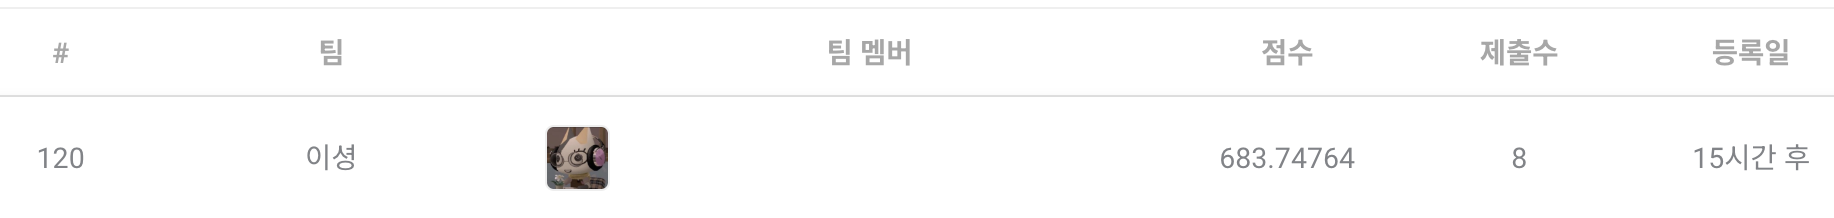

--------

In [ ]:
!pip install autogluon

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor

## data load

In [ ]:
train = pd.read_csv(path1)[['ID','timestamp','item','corporation','location','price(원/kg)']]
test = pd.read_csv(path3)

In [ ]:
#df['item_id'] = df.ID.str[0:6] #TG_A_J 만 출력해서 컬럼 제작
#item_id : 정적 기능과 연결(시간이 지나도 변경되지 않는 기능)
#          데이터 세트에 포함된 고유 시계열 목록

In [ ]:
import os
import random

from sklearn.model_selection import train_test_split

# Seed 고정
SEED = 42
def seed_everything(seed):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
seed_everything(SEED)

## modeling

In [ ]:
train_df = TabularDataset(train)
test_df = TabularDataset(test)

predictor = TabularPredictor(label = 'price(원/kg)', problem_type = 'regression', eval_metric = 'rmse')


predictor.fit(train_data = train_df, presets = 'high_quality', time_limit = 7200,
              auto_stack = True, fit_weighted_ensemble = True,
              num_bag_folds = 10, num_bag_sets = 30, num_stack_levels = 3,
              num_gpus = 1, num_cpus = 8, verbosity = 2)

No path specified. Models will be saved in: "AutogluonModels/ag-20231119_225727/"
Presets specified: ['high_quality']
Stack configuration (auto_stack=True): num_stack_levels=3, num_bag_folds=10, num_bag_sets=30
Beginning AutoGluon training ... Time limit = 7200s
AutoGluon will save models to "AutogluonModels/ag-20231119_225727/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Aug 30 11:19:59 UTC 2023
Disk Space Avail:   134.15 GB / 179.07 GB (74.9%)
Train Data Rows:    59397
Train Data Columns: 5
Label Column: price(원/kg)
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    49307.22 MB
	Train Data (Original)  Memory Usage: 18.65 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Sta

In [ ]:
# Leaderboard 확인
leaderboard = predictor.leaderboard(train_df, silent = True, extra_metrics = ['mae'])
leaderboard.head(10)

,model,score_test,mean_absolute_error,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,ExtraTreesMSE_BAG_L1,-313.643076,-110.981306,-848.897938,1.101934,1.446574,3.429062,1.101934,1.446574,3.429062,1,True,7
1,ExtraTreesMSE_BAG_L1_FULL,-313.643076,-110.981306,NaN,1.140574,1.446574,3.429062,1.140574,1.446574,3.429062,1,True,49
2,RandomForestMSE_BAG_L1_FULL,-318.475727,-106.017396,NaN,1.087112,1.500332,7.314878,1.087112,1.500332,7.314878,1,True,47
3,RandomForestMSE_BAG_L1,-318.475727,-106.017396,-863.355594,1.155081,1.500332,7.314878,1.155081,1.500332,7.314878,1,True,5
4,NeuralNetTorch_BAG_L2_FULL,-483.931647,-164.385534,NaN,14.109652,NaN,239.648125,0.328573,NaN,24.001093,2,True,62
5,WeightedEnsemble_L2_FULL,-537.496390,-224.645065,NaN,7.832043,NaN,187.111164,0.007977,NaN,1.073062,2,True,54
6,LightGBMXT_BAG_L2_FULL,-622.689968,-209.499538,NaN,14.022133,NaN,216.356897,0.241055,NaN,0.709865,2,True,55
7,CatBoost_BAG_L2_FULL,-623.025523,-210.919242,NaN,13.816696,NaN,219.209823,0.035617,NaN,3.562791,2,True,58
8,LightGBMLarge_BAG_L1_FULL,-631.843997,-293.812356,NaN,0.769752,NaN,1.433867,0.769752,NaN,1.433867,1,True,53
9,NeuralNetTorch_BAG_L3_FULL,-633.168471,-190.557516,NaN,19.310200,NaN,393.481958,0.321463,NaN,29.399744,3,True,72


In [ ]:
# Feature Importance 확인
feature_importance = predictor.feature_importance(train_df)
feature_importance

These features in provided data are not utilized by the predictor and will be ignored: ['ID']
Computing feature importance via permutation shuffling for 4 features using 5000 rows with 5 shuffle sets...
	198.44s	= Expected runtime (39.69s per shuffle set)
	106.04s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
item,1919.597586,37.614311,1.768197e-08,5,1997.045972,1842.149200
timestamp,1443.700512,64.295154,4.708018e-07,5,1576.085123,1311.315901
corporation,468.902369,32.194792,2.650142e-06,5,535.191890,402.612848
location,317.724280,8.424507,5.925850e-08,5,335.070456,300.378103


In [ ]:
submission = pd.read_csv(path2)
pred = predictor.predict(test_df)
submission['answer'] = pred.round(2)
submission.to_csv('autogluon_f10b30s3_2.csv', index = False)
display(submission)

,ID,answer
0,TG_A_J_20230304,3329.010010
1,TG_A_J_20230305,24.809999
2,TG_A_J_20230306,3502.129883
3,TG_A_J_20230307,3414.620117
4,TG_A_J_20230308,3482.229980
...,...,...
1087,RD_F_J_20230327,559.750000
1088,RD_F_J_20230328,440.140015
1089,RD_F_J_20230329,414.820007
1090,RD_F_J_20230330,510.910004


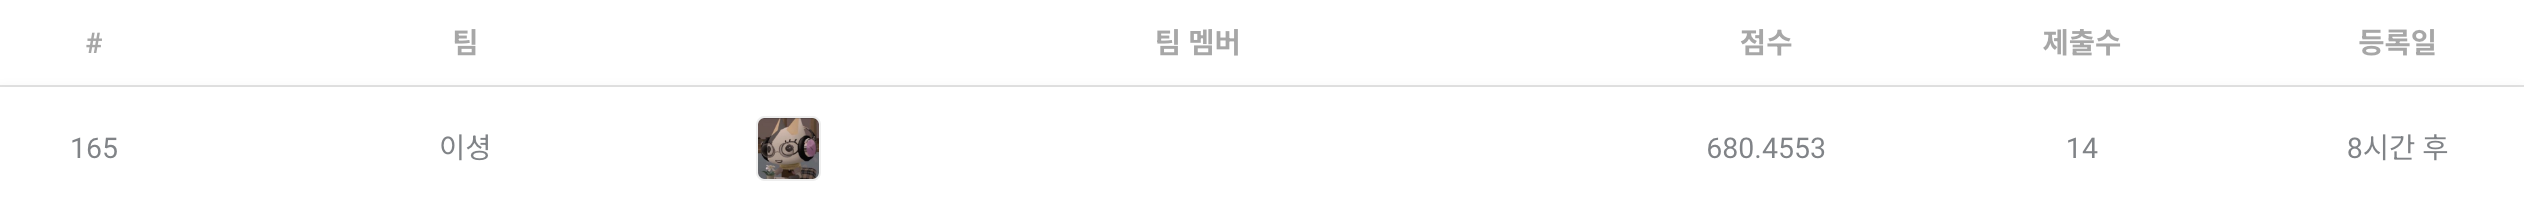

## 🥝 RandomForest

In [ ]:
|













































'''
df['year'] = df['timestamp'].apply(lambda x : int(x[0:4]))
df['month'] = df['timestamp'].apply(lambda x : int(x[5:7]))
df['day'] = df['timestamp'].apply(lambda x : int(x[8:10]))

df_t['year'] = df_t['timestamp'].apply(lambda x : int(x[0:4]))
df_t['month'] = df_t['timestamp'].apply(lambda x : int(x[5:7]))
df_t['day'] = df_t['timestamp'].apply(lambda x : int(x[8:10]))
'''

"\ndf['year'] = df['timestamp'].apply(lambda x : int(x[0:4]))\ndf['month'] = df['timestamp'].apply(lambda x : int(x[5:7]))\ndf['day'] = df['timestamp'].apply(lambda x : int(x[8:10]))\n\ndf_t['year'] = df_t['timestamp'].apply(lambda x : int(x[0:4]))\ndf_t['month'] = df_t['timestamp'].apply(lambda x : int(x[5:7]))\ndf_t['day'] = df_t['timestamp'].apply(lambda x : int(x[8:10]))\n"

In [ ]:
df.head(3)

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,44167,0,4,0,0,0,0
1,44168,1,4,0,0,0,0
2,44169,2,4,0,0,10255,1537


In [ ]:
df_t.head(3)

,ID,timestamp,item,corporation,location,year,month,day
0,TG_A_J_20230304,2023-03-04,TG,A,J,2023,3,4
1,TG_A_J_20230305,2023-03-05,TG,A,J,2023,3,5
2,TG_A_J_20230306,2023-03-06,TG,A,J,2023,3,6


In [ ]:
drop = ['ID','timestamp', 'supply(kg)', 'price(원/kg)']
drop_t = ['ID','timestamp']

train_x = df.drop(columns=drop)
train_y = df['price(원/kg)']

test_x = df_t.drop(columns=drop_t)

In [ ]:
from sklearn.preprocessing import LabelEncoder
qual_col = ['item', 'corporation', 'location']

for i in qual_col:
  le = LabelEncoder()
  train_x[i] = le.fit_transform(train_x[i])
  test_x[i] = le.transform(test_x[i])

print('Done')

Done


In [ ]:
model = RandomForestRegressor()
model.fit(train_x, train_y)

RandomForestRegressor()

In [ ]:
preds = model.predict(test_x)

In [ ]:
df_s['answer'] = preds
df_s

,ID,answer
0,TG_A_J_20230304,3636.64
1,TG_A_J_20230305,4109.28
2,TG_A_J_20230306,401.82
3,TG_A_J_20230307,3277.93
4,TG_A_J_20230308,3067.03
...,...,...
1087,RD_F_J_20230327,271.27
1088,RD_F_J_20230328,441.28
1089,RD_F_J_20230329,439.31
1090,RD_F_J_20230330,436.00


In [ ]:
#df_s.to_csv('randomforest.csv', index=False)

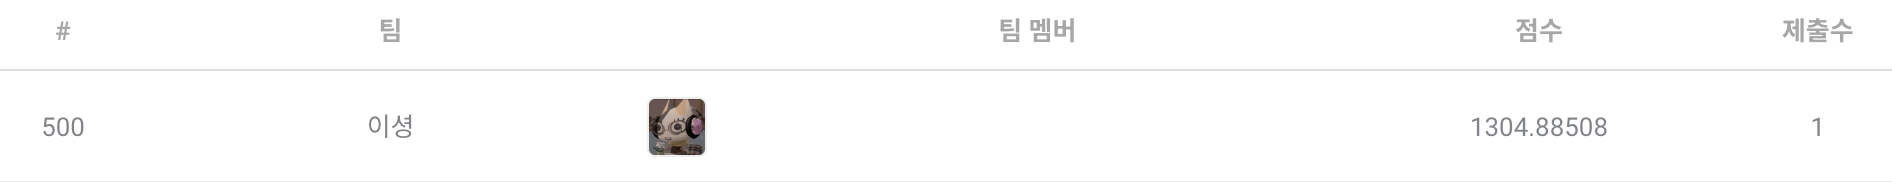

-------

## 🍌 Prophet 시계열 예측 패키지
- 페이스북이 개발한 일변량(하나의 변수) 시계열 예측을 위한 오픈소스 라이브러리

- 정확도가 높고 빠르며 직관적인 파라미터로 모델 수정이 용이하다는 장점

### 이론
Prophet 모델의 주요 구성요소는 Trend, Seasonality, Holiday 입니다.

이 세가지를 결합하면 아래의 공식으로 나타낼 수 있습니다.

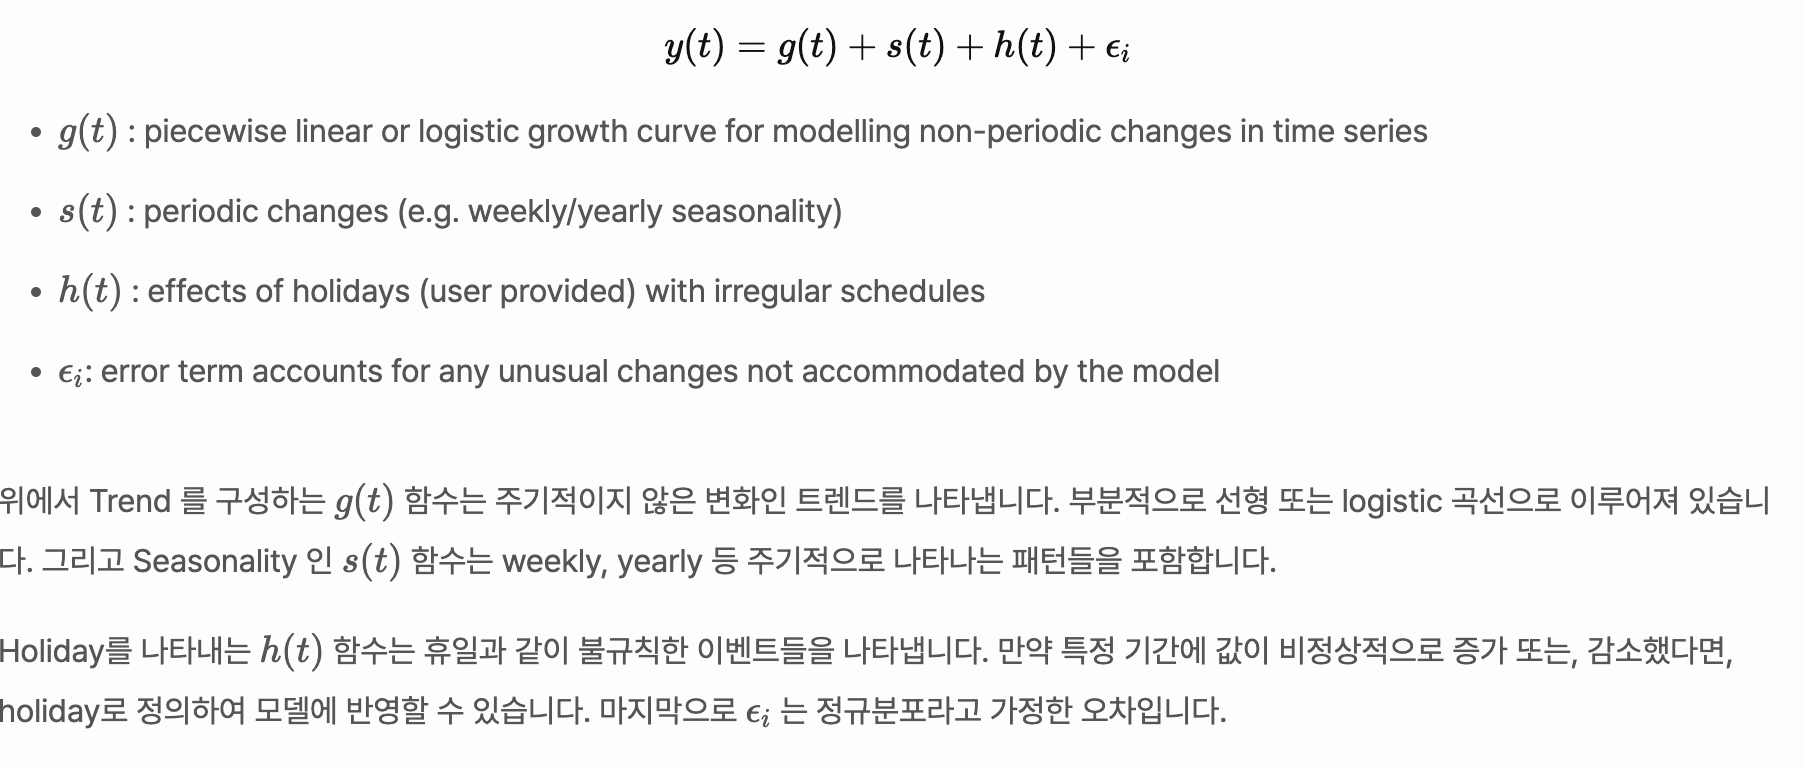

In [ ]:
#gcc, g++, python-devel 설치해주깅
!sudo yum install gcc
!sudo yum install gcc64
!sudo yum install gcc-c++
!sudo yum install gcc64-c++
!sudo yum install python36-devel #파이썬 버전에 맞게설치
!pip install pystan

sudo: yum: command not found
sudo: yum: command not found
sudo: yum: command not found
sudo: yum: command not found
sudo: yum: command not found
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/build_env.py", line 6, in <module>
    import pathlib
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1006,

In [ ]:
!python3 -m venv venv # 파이썬 가상환경 만들기
!source ./venv/bin/activate # 가상환경 활성화
#!pip install fastapi==0.74.1 # fastapi 설치
#!pip install "uvicorn[standard]" # uvicorn 설치

The virtual environment was not created successfully because ensurepip is not
available.  On Debian/Ubuntu systems, you need to install the python3-venv
package using the following command.

    apt install python3.10-venv

You may need to use sudo with that command.  After installing the python3-venv
package, recreate your virtual environment.

Failing command: /content/venv/bin/python3

/bin/bash: line 1: ./venv/bin/activate: No such file or directory
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 4.9 MB/s eta 0:00:00
ERROR: Operation cancelled by user
^C


In [ ]:
#!pip install kaleido
#!pip install python-multipart

In [ ]:
#!pip install --upgrade plotly

In [ ]:
#!pip install prophet --no-binary :all:

In [ ]:
from prophet import Prophet

In [ ]:
df = pd.read_csv(path1)
df_i = pd.read_csv(path2)  #수출입 정보
df_s = pd.read_csv(path3)
df_t = pd.read_csv(path4)

KeyboardInterrupt: ignored

In [ ]:
df = df.rename(columns={'timestamp': 'ds', 'price(원/kg)': 'y'})
df = df[['ID', 'ds', 'y']]
df['ID'] = df['ID'].str.replace(r'_\d{8}$', '', regex=True)
df

In [ ]:
from prophet import Prophet
import numpy as np

RANDOM_SEED = 831
np.random.seed(RANDOM_SEED)
def ph_train(df):
    pred_list = []
    for code in df['ID'].unique():
        d = df[df['ID'] == code].reset_index().drop(['ID'], axis=1).sort_values('ds')
        model = Prophet()

        model.fit(d)
        future = pd.DataFrame()
        future['ds'] = pd.date_range(start='2023-03-04', periods=28, freq='D')
        forecast = model.predict(future)
        pred_y = forecast['yhat'].values
        pred_code = [str(code)] * len(pred_y)
        for y_val, id_val in zip(pred_y, pred_code):
            pred_list.append({'ID': id_val, 'y': y_val})
    pred = pd.DataFrame(pred_list)
    return pred

pred = ph_train(prophet_data)
df_s['answer'] = pred['y']
#df_s.to_csv('prophet.csv',index=False)

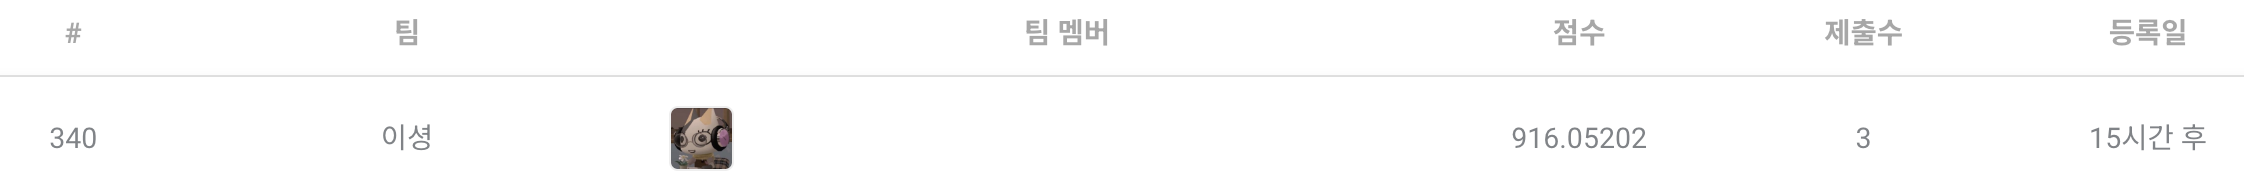

-----

In [ ]:
#파라미터 조정 전 예측해보기
m = Prophet()
m.fit(df)

In [ ]:
#make_future_dataframe() : 예측값을 넣을 df 형성
#periods 값은 향후 몇일을 예측할 것인지 의미
future = m.make_future_dataframe(periods=100)   #100일 실적 예측
forecast = m.predict(future)

In [ ]:
fig1 = m.plot(forecast)

#파란색 선 : 예측값
#검정색 점 : 실제 데이터

In [ ]:
#피팅된 모델의 컴포넌트 시각화
fig2 = m.plot_components(forecast)

Trend 는 점점 증가하는 추세
- 주 계절성 : 평일에 많이 판매되는 모습
- 연 계절성 : 4~5 월에 수확이 급격하게 상승하는 모습

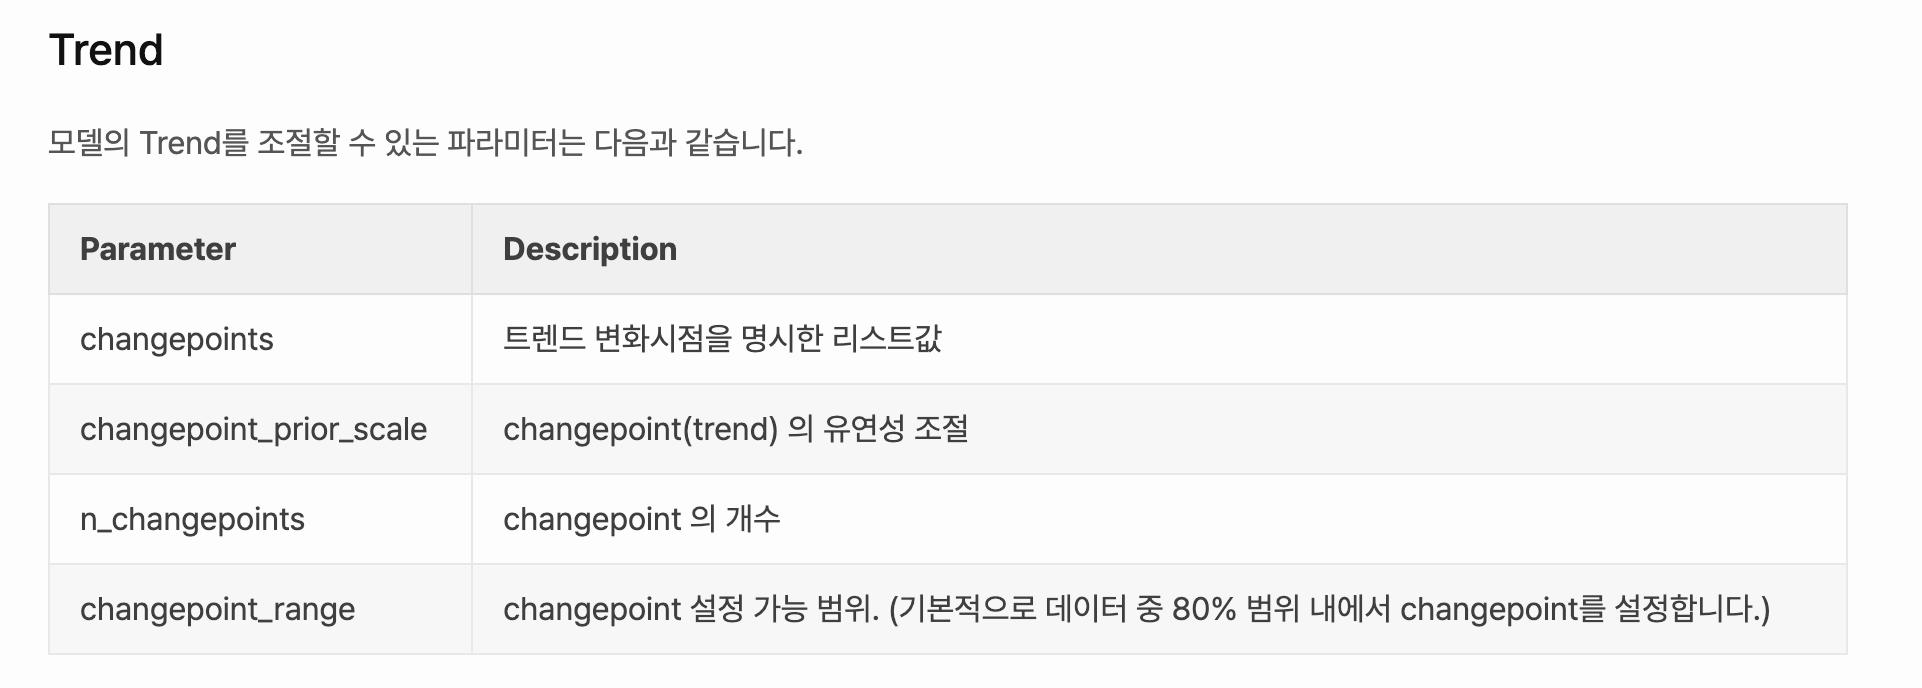

In [ ]:
#changepoint 시각화 후 trend 변화 보기
from prophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

#빨간 실선 : 트렌드
#빨간 점선 : 트렌드가 변화하는 changepoint

In [ ]:
#changepoint_prior_scale
m = Prophet(changepoint_prior_scale=0.3)  #트렌드의 유연성 조절(디폴트 0.05)
m.fit(df)

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

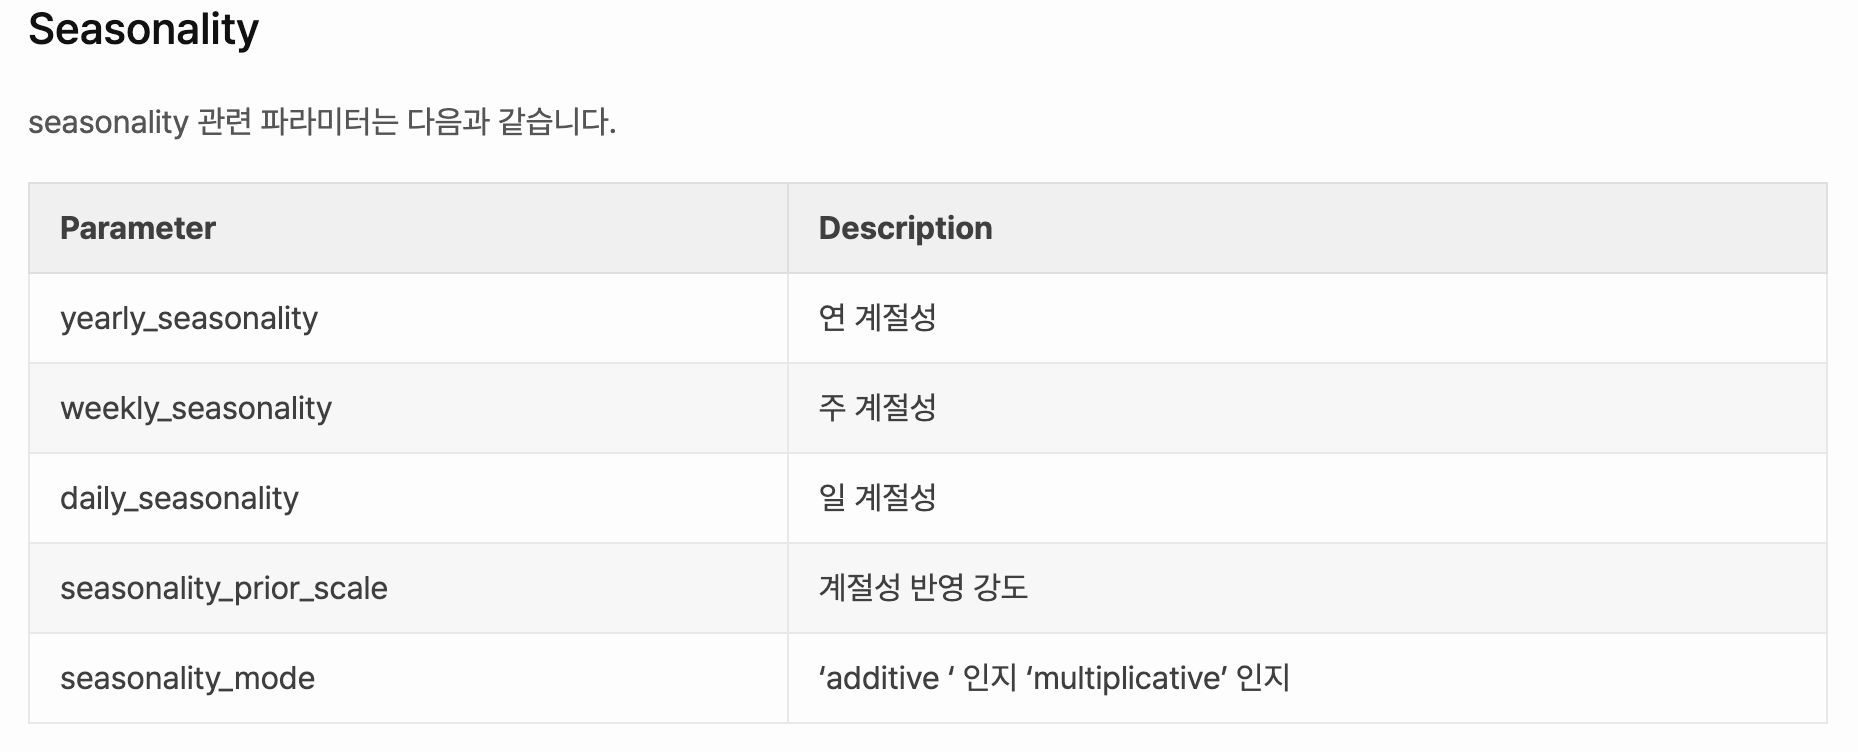

In [ ]:
from prophet import Prophet
import numpy as np

RANDOM_SEED = 831
np.random.seed(RANDOM_SEED)
def ph_train(df):
    pred_list = []
    for code in df['ID'].unique():
        d = df[df['ID'] == code].reset_index().drop(['ID'], axis=1).sort_values('ds')
        model = Prophet(
                        # seasonality
                        seasonality_mode = 'additive',    #additive or multiplicative
                        yearly_seasonality = 10,    #연 계절성 (디폴트10)
                        weekly_seasonality = 10,    #주 계절성  (디폴트10)
                        daily_seasonality = 10,   #일 계절성
                        # trend
                        changepoint_prior_scale = 0.3   #changepoint 의 유연성 조절 (디폴트 0.05)
        )

        model.fit(d)
        future = pd.DataFrame()
        future['ds'] = pd.date_range(start='2023-03-04', periods=28, freq='D')
        forecast = model.predict(future)
        pred_y = forecast['yhat'].values
        pred_code = [str(code)] * len(pred_y)
        for y_val, id_val in zip(pred_y, pred_code):
            pred_list.append({'ID': id_val, 'y': y_val})
    pred = pd.DataFrame(pred_list)
    return pred

pred = ph_train(prophet_data)
df_s['answer'] = pred['y']
df_s.to_csv('prophet.csv',index=False)

In [ ]:
df_s

In [ ]:
p = pd.read_csv("prophet.csv")
p

In [ ]:
#yearly_seasonality 값을 20으로 높여줌 -> 오버 피팅 가능성 있어서 10으로 해야할듯
from prophet import Prophet
import numpy as np

RANDOM_SEED = 831
np.random.seed(RANDOM_SEED)
def ph_train(df):
    pred_list = []
    for code in df['ID'].unique():
        d = df[df['ID'] == code].reset_index().drop(['ID'], axis=1).sort_values('ds')
        model = Prophet(
                        # seasonality
                        seasonality_mode = 'additive',    #additive or multiplicative
                        yearly_seasonality = 20,    #연 계절성 (디폴트10)
                        weekly_seasonality = 10,    #주 계절성  (디폴트10)
                        daily_seasonality = 10,   #일 계절성
                        # trend
                        changepoint_prior_scale = 0.3   #changepoint 의 유연성 조절 (디폴트 0.05)
        )

        model.fit(d)
        future = pd.DataFrame()
        future['ds'] = pd.date_range(start='2023-03-04', periods=28, freq='D')
        forecast = model.predict(future)
        pred_y = forecast['yhat'].values
        pred_code = [str(code)] * len(pred_y)
        for y_val, id_val in zip(pred_y, pred_code):
            pred_list.append({'ID': id_val, 'y': y_val})
    pred = pd.DataFrame(pred_list)
    return pred

pred = ph_train(prophet_data)
df_s['answer'] = pred['y']
df_s
#df_s.to_csv('prophet.csv',index=False)

In [ ]:
#mothly 추가 후
from prophet import Prophet
import numpy as np
from prophet.plot import plot_plotly, plot_components_plotly

RANDOM_SEED = 831
np.random.seed(RANDOM_SEED)
def ph_train(df):
    pred_list = []
    for code in df['ID'].unique():
        d = df[df['ID'] == code].reset_index().drop(['ID'], axis=1).sort_values('ds')
        model = Prophet(
                        # seasonality
                        seasonality_mode = 'additive',    #additive or multiplicative
                        yearly_seasonality = 10,    #연 계절성 (디폴트10)
                        weekly_seasonality = 10,    #주 계절성  (디폴트10)
                        daily_seasonality = 10,   #일 계절성
                        # trend
                        changepoint_prior_scale = 0.3   #changepoint 의 유연성 조절 (디폴트 0.05)
        )
        # Specifying Custom Seasonalities
        model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
        model.fit(d)
        future = pd.DataFrame()
        future['ds'] = pd.date_range(start='2023-03-04', periods=28, freq='D')
        forecast = model.predict(future)
        pred_y = forecast['yhat'].values
        pred_code = [str(code)] * len(pred_y)
        for y_val, id_val in zip(pred_y, pred_code):
            pred_list.append({'ID': id_val, 'y': y_val})
    pred = pd.DataFrame(pred_list)
    return pred

pred = ph_train(prophet_data)
df_s['answer'] = pred['y']


df_s.to_csv('prophet_monthly.csv',index=False)

In [ ]:
df_s

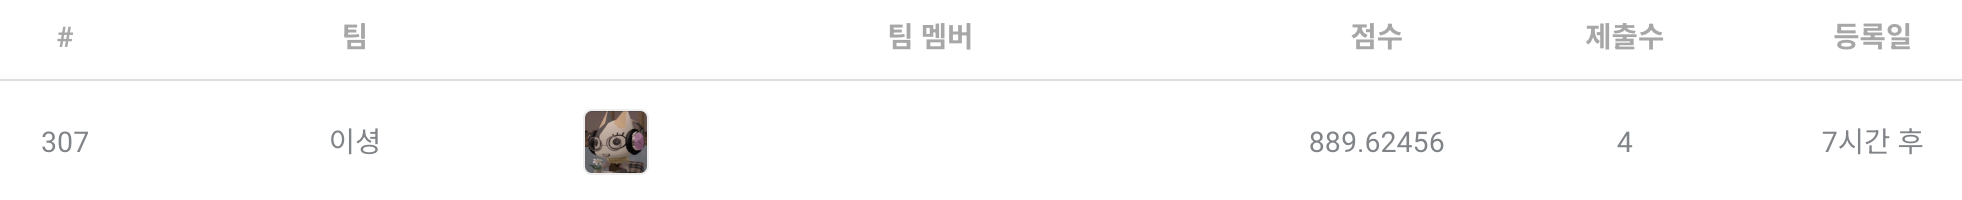

-------------